<a href="https://colab.research.google.com/github/AlvinaAnoop/SCT_ML_2/blob/main/SCT_ML_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Display the first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.shape

(200, 5)

In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [35]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [36]:
df.duplicated().sum()

0

In [21]:
# Features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [23]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# View the scaled data
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## Distribution of Age, Annual Income, and Spending Score

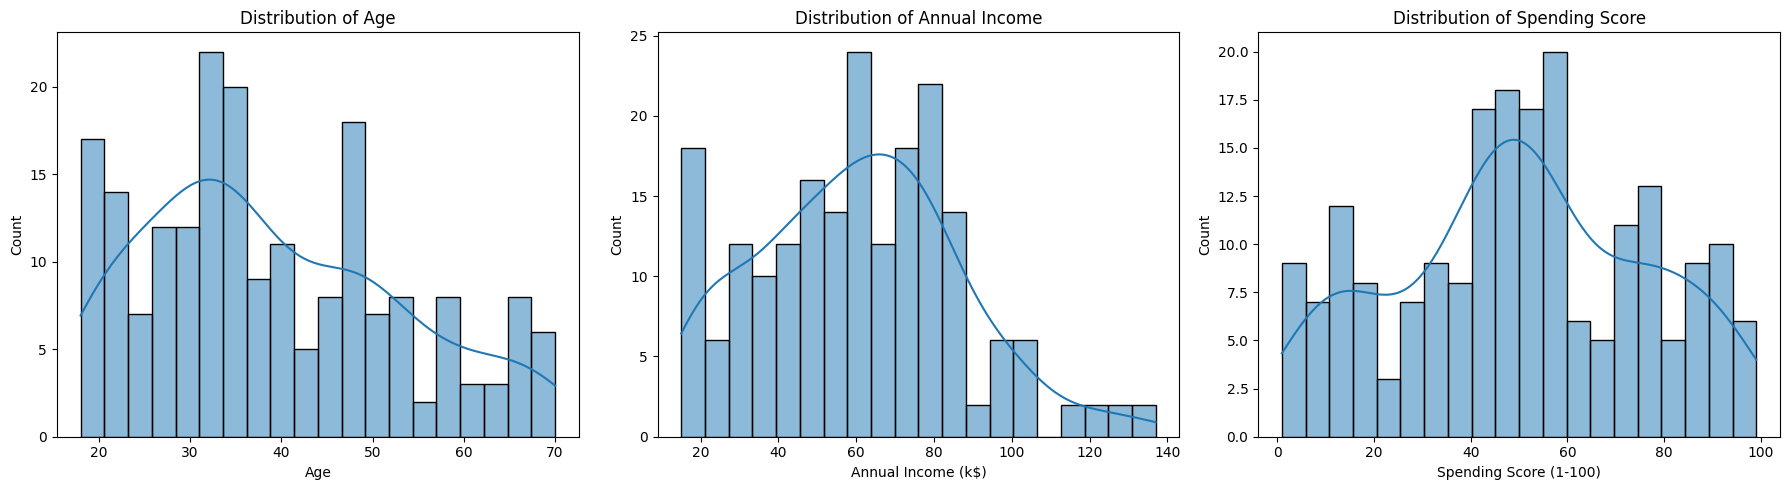

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

## Relationship between Annual Income and Spending Score

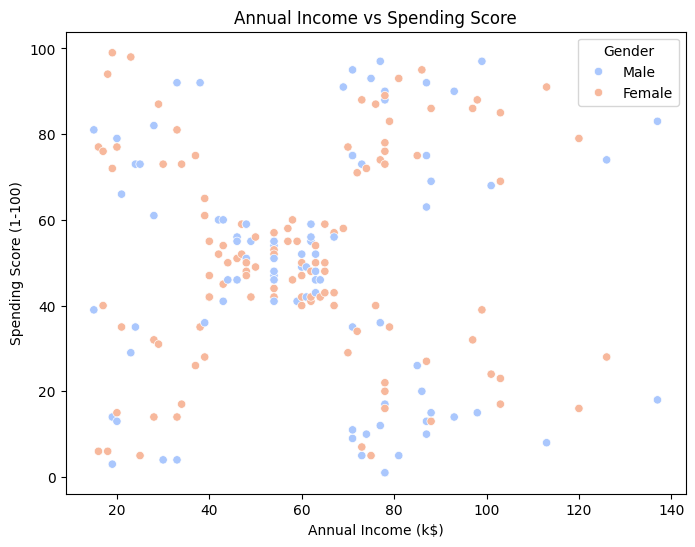

In [26]:
# Scatterplot for Annual Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='coolwarm')
plt.title('Annual Income vs Spending Score')
plt.show()

# Apply K-Means Clustering

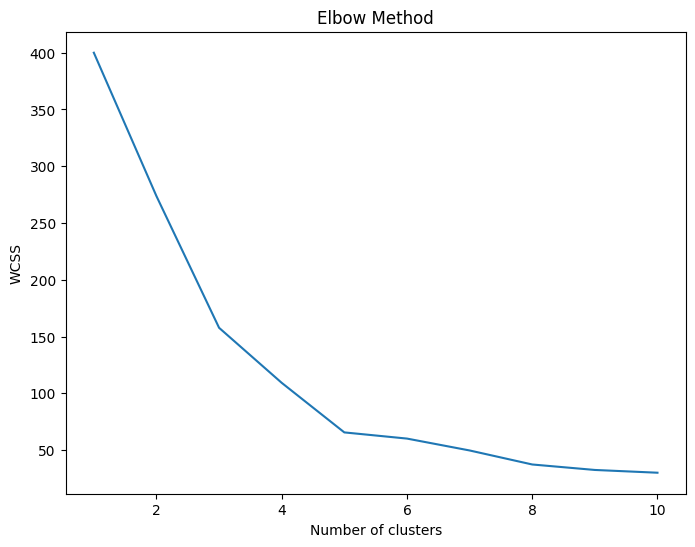

In [27]:
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [32]:
# Applying KMeans clustering with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataset
df['Cluster'] = y_kmeans

# Check the first few rows with cluster labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


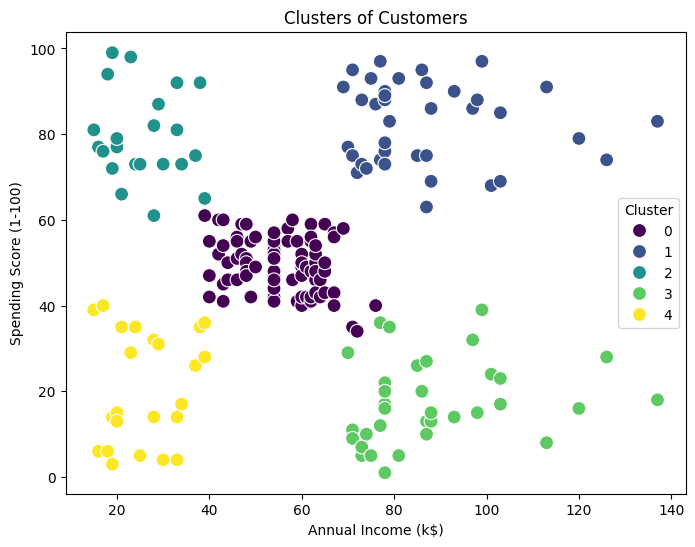

In [33]:
# Visualizing clusters with scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', data=df, s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
